In [1]:
# Importing the Libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
# Reading the data

bank = pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Exploratory Data Analysis

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank.shape

(45211, 17)

In [5]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Checking for duplicate values

bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [7]:
# Checking for Missing values

bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: >

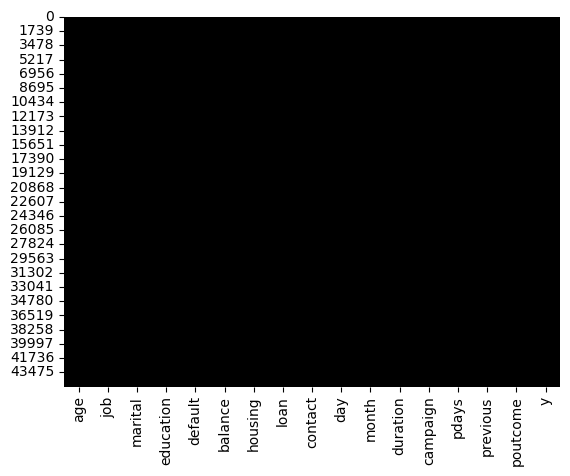

In [8]:
import seaborn as sns
cols = bank.columns 
colours = ['black', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(bank.isnull(), cmap=sns.color_palette(colours), cbar = False)

In [9]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [16]:
from sklearn.preprocessing import LabelEncoder

bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']] = bank[['job','marital','education','default','housing','loan','contact','month','poutcome','y']].apply(LabelEncoder().fit_transform)

In [17]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [20]:
bank['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [24]:
# Dividing our data into input and output variables 

X = bank.iloc[:,0:16]
Y = bank.iloc[:,-1]

In [25]:
#Logistic regression and fit the model

classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
# Predict for X dataset

y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted': classifier.predict(X)})

In [28]:
y_pred_df

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [29]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39279   643]
 [ 4437   852]]


In [30]:
# Classification report

from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.57      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



In [31]:
# P-Value from Logit model

classifier.predict_proba(X)[0][1]

0.05148856059297846

In [32]:
# Other Coefficients

classifier.coef_

array([[-3.16953577e-02,  1.46017623e-02, -9.21358390e-02,
        -1.31759431e-02, -4.79461243e-03,  4.00494274e-05,
        -1.81633580e-01, -5.35163404e-02, -1.86781476e-01,
        -8.42450313e-03, -5.99166242e-02,  3.27159449e-03,
        -2.67082636e-01, -1.23700099e-03,  1.20014661e-01,
        -1.80601773e-01]])

In [33]:
# Intercept value

classifier.intercept_ 

array([-0.07053186])

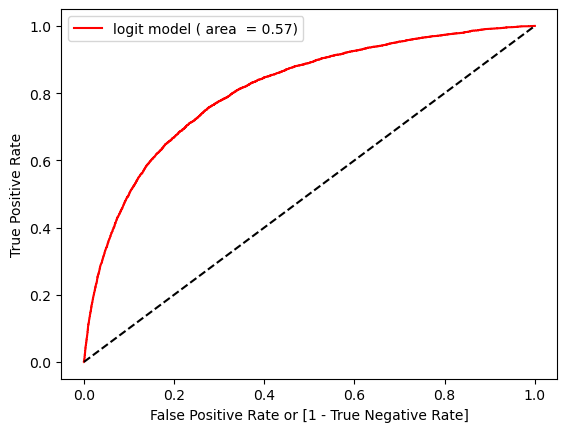

In [34]:
# ROC Curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [35]:
auc

0.5724913226281891

In [36]:
import statsmodels.api as sm
model1 =  sm.Logit(Y,X)
model1.fit().summary()

Optimization terminated successfully.
         Current function value: 0.276364
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45195
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Oct 2023   Pseudo R-squ.:                  0.2342
Time:                        20:53:41   Log-Likelihood:                -12495.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0235      0.001    -18.322      0.000      -0.026      -0.021
job           -0.0157      0.005     -3.051      0.002      -0.026      -0.006
marital       -0.1877      0.026     -7.181      0.000      -0.239      -0.136
education      0.0308      0.022      1.389      0.165      -0.013       0.074
default       -0.4022      0.159     -2.534      0.011      -0.713      -0.091
balance     1.978e-05   4.51e-06      4.381      0.000    1.09e-05    2.86e-05
housing       -1.2719      0.037    -34.810      0.000      -1.343      -1.200
loan          -0.8290      0.056    -14.696      0.000      -0.940      -0.718
contact       -0.5961      0.027    -22.449      0.000      -0.648      -0.544
day           -0.0169      0.002     -8.524      0.000      -0.021      -0.013
month          0.0054      0.005      1.013      0.311      -0.005       0.016
duration       0.0038   6.01e-05     63.105      0.000       0.004       0.004
campaign      -0.1682      0.011    -15.928      0.000      -0.189      -0.147
pdays          0.0002      0.000      0.878      0.380      -0.000       0.001
previous       0.0548      0.008      6.879      0.000       0.039       0.070
poutcome      -0.2257      0.022    -10.244      0.000      -0.269      -0.183
==============================================================================
"""